# <span style="color:green"> Numerical Simulation Laboratory (NSL) </span>
## <span style="color:blue">  Numerical exercises 3</span>

### Exercise 03.1 <span style="color:red"> Plain vanilla option pricing </span>

Black-Scholes theory assumes that the time evolution of the asset price is stochastic and exhibits geometric Brownian motion (GBM) with constant risk-free interest rate $r$ and volatility $\sigma$.

Black-Scholes <span style="color:blue"> analytic solution </span> for the price at time t<T:
- European Call-option price:
$$ C\left[ S(t),t \right] = S(t) N(d_1) -K e^{-r(T-t)} N(d_2) $$
- European Put-option price:
$$ P\left[ S(t),t \right] = S(t) \left[ N(d_1)-1\right] -K e^{-r(T-t)} \left[ N(d_2)-1\right]$$

where 
$$d_1 = \frac{1}{\sigma\sqrt{T-t}}\left[ \ln \left( \frac{S(t)}{K} \right) + \left( r+\frac{\sigma^2}{2} (T-t) \right)\right]$$

where $d_2 = d_1 - \sigma\sqrt{T-t}$, and where
$$ N(x) = \int_{-\infty}^{x} dz \, e^{-\frac{z^2}{2}} = \frac{1}{2} \left[ 1+ {\rm erf} \left( \frac{x}{\sqrt{2}}\right) \right]$$
is the cumulative of Gaussian $\sim \mathcal{N}(\mu=0,\sigma^2=1)$,
and where
$${\rm erf}(x) = \frac{2}{\sqrt{\pi}}\int_{0}^{x} dz \, e^{-z^2}$$

By using the following parameters: 
- asset price at $t=0$: $S(0)=100$
- delivery time: $T=1$
- strike price: $K=100$
- risk-free interest rate: $r=0.1$
- volatility: $\sigma=0.25$

compute at time $t=0$ **via Monte Carlo** the European call-option price, $C[S(0),0]$, and put-option price, $P[S(0),0]$:

1. By sampling **directly** the final asset price $S(T)$ for a $GBM(r,\sigma^2)$
2. By sampling the discretized $GBM(r,\sigma^2)$ path of the asset price 
dividing $[0,T]$ in $10^2$ time intervals: $S(0)$, $S(t_1)$, $S(t_2)$, ... up to $S(t_{100}=T=1)$

Remember that given an asset price $S\sim GBM(\mu,\sigma^2)$, with initial value $S(0)$, then
$$S(t) = S(0) \exp\left[ \left(\mu-\frac{1}{2}\sigma^2\right)t+\sigma W(t)\right]$$
where $W(t)\sim\mathcal{N}(0,t)$.
Moreover, since the increments of $W$ are independent and normally distributed, the simple recursive procedure for sampling discretized values of $S\sim GBM(\mu,\sigma^2)$ at $t_1 < t_2 < … < t_n$ is:
$$S(t_{i+1}) = S(t_i) \exp\left[ \left(\mu-\frac{1}{2}\sigma^2\right)(t_{i+1}-t_i)
+\sigma Z_{i+1}\sqrt{t_{i+1}-t_i}\right]$$
with $Z_i \sim \mathcal{N}(0,1)$

Make four pictures for the estimation of the European call-option prices, $C[S(0),0]$ (direct and discretized), and put-option prices, $P[S(0),0]$ (direct and discretized), with their uncertainties with a large number of asset prices at time $t=T$, say $M\ge 10^4$, as a function of the number of blocks, $N$</font>. As usual, in computing statistical uncertainties, use data blocking.

Calcolo inizialmente le soluzione analitiche per il confronto tramite il codice fornito.

In [2]:
import scipy
from scipy.special import erf
import numpy as np
from numpy import exp
from numpy.lib.scimath import log, sqrt
import matplotlib
import matplotlib.pyplot as plt
import math

# data
S0 = 100.
K = 100.
T = 1.
r = 0.1
sigma = 0.25
t=0

def N(x):
    return 0.5 * (1. + erf(x / sqrt(2.)))

def black_scholes(S0, K, T, r, sigma):
    d1 = 1./(sigma * sqrt(T)) * (log(S0 / K) + (r + (sigma**2) / 2.) * T)
    d2 = d1 - sigma * sqrt(T)
    C = S0 * N(d1) - K * exp(-r * T) * N(d2)
    P = S0 *(N(d1) - 1.) - K * exp(-r * T) * (N(d2)-1.)
    return C, P

if __name__ == "__main__":
    call, put = black_scholes(S0, K, T, r, sigma)
    print(" == BLACK-SCHOLES ==")
    print("call: ", call)
    print("put: ", put)

 == BLACK-SCHOLES ==
call:  14.975790778311286
put:  5.4595325819072364


Di seguito sono riportate 4 figure per le 4 simulazioni eseguite relative al valore delle Call Option e delle Put Option entrambe sia nel caso in cui l'evoluzione sia diretta al tempo t o discrettizatta sulle $t_i$. Riporto anche le funzione implementate in c++ per eseguire il moto browniano e il calcolo delle Call e Put Option:

```cpp
// Fa evolvere il sistema di moto Browniano in maniera diretta
double GBM(double t, double mu, double sigma, double S0, Random& rnd) {
   return S0*exp((mu-0.5*pow(sigma,2))*t+sigma*rnd.Gauss(0,t));
}

// Fa evolvere il sistema di moto Browniano in maniera discreta
double GBM_dis(double ti, double tii, double mu, double sigma, double Sti, Random& rnd) {
   return Sti*exp((mu-0.5*pow(sigma,2))*(tii-ti)+sigma*rnd.Gauss(0,1)*sqrt(tii-ti));
}

// Calcola la Call Option
double Call_opt(double r, double t, double S, double K) {
   return exp(-r*t)*max(0.0,S-K);
}

// Calcola la Put Option
double Put_opt(double r, double t, double S, double K) {
   return exp(-r*t)*max(0.0,K-S);
}
```

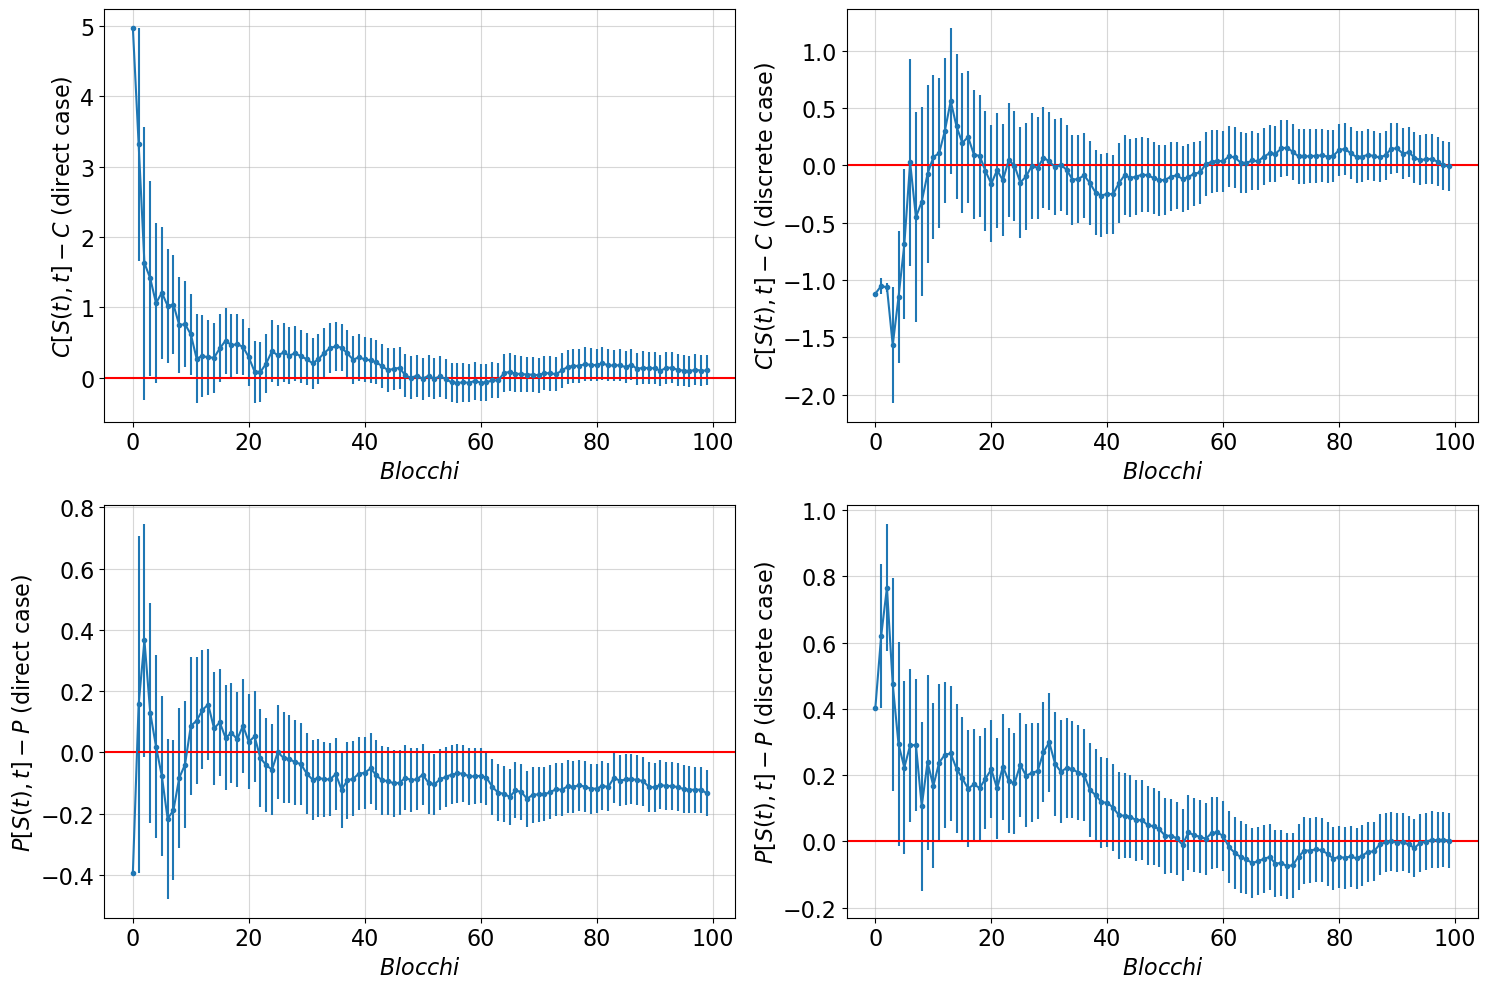

In [5]:
sum_prog,err_prog = np.loadtxt('./Esercizio_03.1/OUTPUT/output.dat', usecols = (0, 1), unpack = True)

plt.figure(figsize=(15, 10))

plt.subplot(2, 2, 1)
x = np.arange(len(sum_prog))
plt.errorbar(x,sum_prog-call,yerr=err_prog, linewidth=1.5, marker='o', markersize=3)
plt.axhline(y=0, color = 'r', linestyle = '-')
plt.xlabel('$Blocchi$', fontsize=16)
plt.ylabel(r'$C\left[ S(t),t \right] - C$ (direct case)', fontsize=16)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.grid(True, alpha=0.5)

sum_prog,err_prog = np.loadtxt('./Esercizio_03.1/OUTPUT/output_2.dat', usecols = (0, 1), unpack = True)

plt.subplot(2, 2, 2)
x = np.arange(len(sum_prog))
plt.errorbar(x,sum_prog-call,yerr=err_prog, linewidth=1.5, marker='o', markersize=3)
plt.axhline(y=0, color = 'r', linestyle = '-')
plt.xlabel('$Blocchi$', fontsize=16)
plt.ylabel(r'$C\left[ S(t),t \right] - C$ (discrete case)', fontsize=16)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.grid(True, alpha=0.5)

sum_prog,err_prog = np.loadtxt('./Esercizio_03.1/OUTPUT/output_3.dat', usecols = (0, 1), unpack = True)

plt.subplot(2, 2, 3)
x = np.arange(len(sum_prog))
plt.errorbar(x,sum_prog-put,yerr=err_prog, linewidth=1.5, marker='o', markersize=3)
plt.axhline(y=0, color = 'r', linestyle = '-')
plt.xlabel('$Blocchi$', fontsize=16)
plt.ylabel(r'$P\left[ S(t),t \right] - P$ (direct case)', fontsize=16)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.grid(True, alpha=0.5)

sum_prog,err_prog = np.loadtxt('./Esercizio_03.1/OUTPUT/output_4.dat', usecols = (0, 1), unpack = True)

plt.subplot(2, 2, 4)
x = np.arange(len(sum_prog))
plt.errorbar(x,sum_prog-put,yerr=err_prog, linewidth=1.5, marker='o', markersize=3)
plt.axhline(y=0, color = 'r', linestyle = '-')
plt.xlabel('$Blocchi$', fontsize=16)
plt.ylabel(r'$P\left[ S(t),t \right] - P$ (discrete case)', fontsize=16)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.grid(True, alpha=0.5)

plt.tight_layout()
plt.show()

### For comparison, Black-Scholes analytic solution:

In [3]:
import scipy
from scipy.special import erf
import numpy
from numpy import exp
from numpy.lib.scimath import log, sqrt

# data
S0 = 100.
K = 100.
T = 1.
r = 0.1
sigma = 0.25
t=0

def N(x):
    return 0.5 * (1. + erf(x / sqrt(2.)))

def black_scholes(S0, K, T, r, sigma):
    d1 = 1./(sigma * sqrt(T)) * (log(S0 / K) + (r + (sigma**2) / 2.) * T)
    d2 = d1 - sigma * sqrt(T)
    C = S0 * N(d1) - K * exp(-r * T) * N(d2)
    P = S0 *(N(d1) - 1.) - K * exp(-r * T) * (N(d2)-1.)
    return C, P

if __name__ == "__main__":
    call, put = black_scholes(S0, K, T, r, sigma)
    print(" == BLACK-SCHOLES ==")
    print("call: ", call)
    print("put: ", put)

 == BLACK-SCHOLES ==
call:  14.975790778311286
put:  5.4595325819072364
